In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
import requests
from bs4 import BeautifulSoup
from IPython.display import Image
from selenium import webdriver


In [2]:
# sending HTTP requests
targetSite = 'https://www.nate.com/'
header = {'User-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko'}
request = requests.get(targetSite, headers = header)
# print(request) >> <Response [200]> success
html = request.text # target website's html
soup = BeautifulSoup(html, 'html.parser')

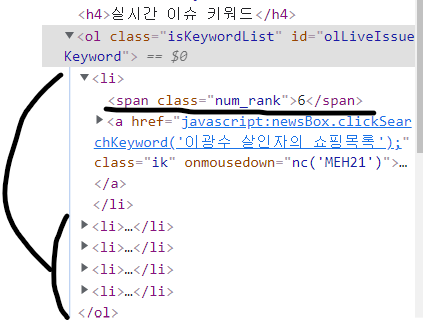

In [3]:
Image('./images/crawling_rankings.png')

In [4]:
# real time keywords' rankings
ranks = soup.findAll('span', {'class' : 'num_rank'})
for rank in ranks:
    print(rank.text)

6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


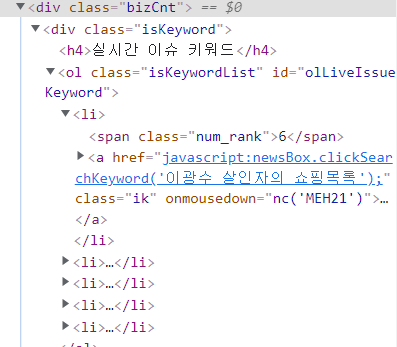

In [5]:
Image('./images/crawling_keywords.png')

In [6]:
# real time keywords
keywords = soup.findAll('a', {'class':'ik'})
print(keywords[0])
print('*' * 80)
print(keywords[0].text.strip().split('\n'))
print('*' * 80)
print(keywords[0].text.strip().split('\n')[0])
print('*' * 80)
print(keywords[0].text.strip().split('\n')[1])



<a class="ik" href="javascript:newsBox.clickSearchKeyword('의료인력 60명 요양시설');" onmousedown="nc('MEH21')">
<span class="txt_rank">의료인력 60명 요양시설</span>
<span class="fc down"><span class="nHide">하락</span>1</span>
</a>
********************************************************************************
['의료인력 60명 요양시설', '하락1']
********************************************************************************
의료인력 60명 요양시설
********************************************************************************
하락1


In [7]:
# real time keywords and their rankings
 
for i in range(5):
    rank = ranks[i].text
    line = keywords[i].text.strip().split('\n')
    keyword = line[0]
    upDown = line[1]
    print('{0:>2s}위: {1}'.format(rank, keyword), end = ' ')
    if upDown[:2] == '상승':
        print('[{}{}]'.format('↑',upDown[2:]))
              
    elif upDown[:2] == '하락':
        print('[{}{}]'.format('↓',upDown[2:]))
    elif upDown[:2] == '동일':
        print(' - ')
    else:
        print(' new ')

 6위: 의료인력 60명 요양시설 [↓1]
 7위: 지옥 김현주 [↓1]
 8위: 이성윤 공소장 압수수색 [↓1]
 9위: 스토킹 유족 김병찬 [↓1]
10위: 이정후 2021 최고의 [↓1]


Another way of crawling is using the selenium's webdriver.
We can download chrome webdriver and display the target website there to proceed with the same process.

In [8]:
# download chromedriver (has to be the same version as the chrome user is using)
driver = webdriver.Chrome('./chromedriver.exe')
# use get() method to display the target website on virtual chrome
driver.get('https://www.nate.com/')
html = driver.page_source
# print(html)
soup = BeautifulSoup(html, 'html.parser')
# print(soup)

ranks = soup.findAll('span', {'class': 'num_rank'})
issues = soup.findAll('a', {'class': 'ik'})
for i in range(5):
    rank = ranks[i].text
    issue = issues[i].text.strip().split('\n')[0]
    upDown = issues[i].text.strip().split('\n')[1]
    print('{0:>2s}위: {1} '.format(rank, issue), end='')
    if upDown[:2] == '상승':
        print('[{}{}]'.format('↑', upDown[2:]))
    elif upDown[:2] == '하락':
        print('[{}{}]'.format('↓', upDown[2:]))
    elif upDown[:2] == '동일':
        print('[-]')
    else:
        print('new')

 6위: 의료인력 60명 요양시설 [↓1]
 7위: 지옥 김현주 [↓1]
 8위: 이성윤 공소장 압수수색 [↓1]
 9위: 스토킹 유족 김병찬 [↓1]
10위: 이정후 2021 최고의 [↓1]


### Successfully crawled 5 keywords and their rankings using these two methods. The reason why the other 5 keywords are not appearing is because the website only shows 5 out of 10 real time issues at a time.  It shows keywords ranking from 1st to 5th for few seconds before switching them with next 5 keywords ranking from 6th to 10th . This is repeated back and forth.
### We can show 10 keywords and their rankings all at once by using ajax (different method). 

In [9]:
import json

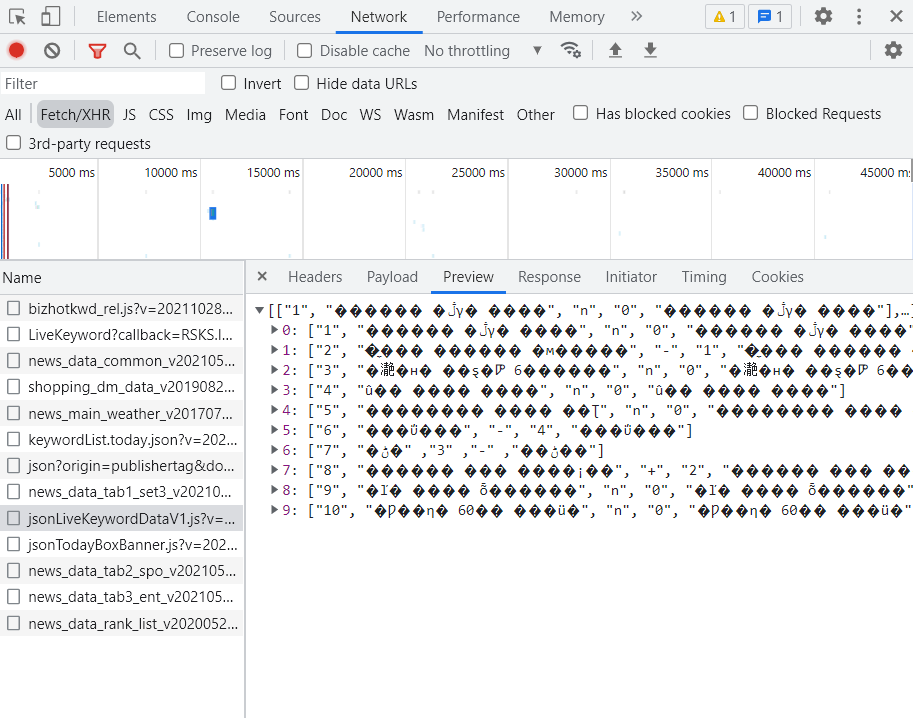

In [10]:
Image('./images/json_keywords.png')
# we can see all ten keywords and their rankings this way at once

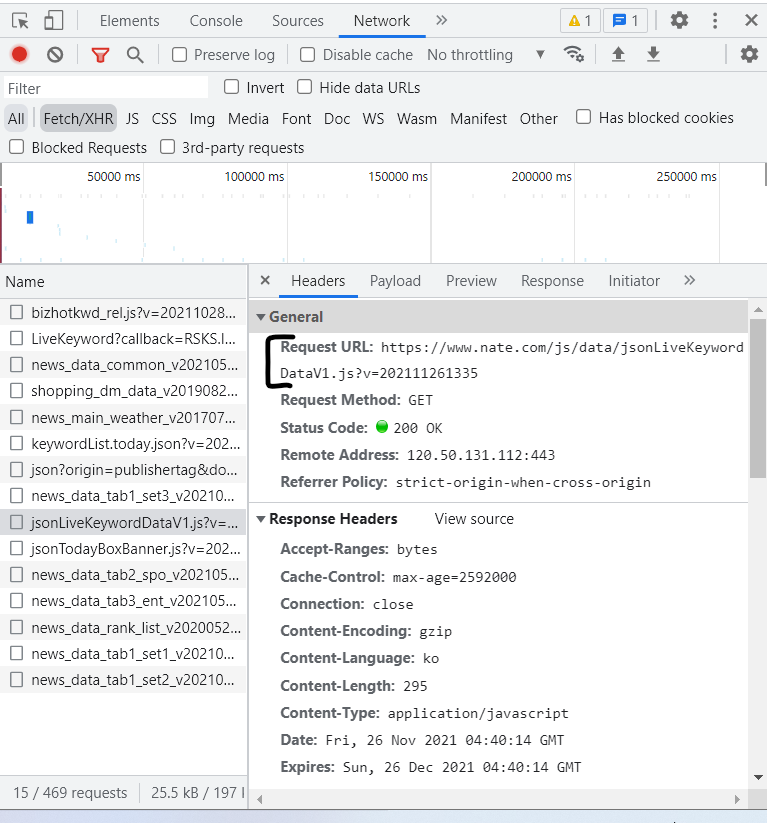

In [11]:
Image('./images/json_keywords(2).png')
# copy the Request URL
# since the Request Method is GET, get(#targetSite) has to be used

In [12]:
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202111261340'
request = requests.get(targetSite)
# print(request) >> <Response [200]>
# change the encoding to 'euc-kr'
request.encoding = 'euc-kr'

In [13]:
str_keywords = request.text
print(type(str_keywords))
print(str_keywords)
# converting str into list using json's loads()

print('*' * 80)
lst_keywords = json.loads(str_keywords)
print(type(lst_keywords))
print(lst_keywords)

<class 'str'>
[["1",  "정인이 양모 무기징역",  "s",  "0",  "정인이 양모 무기징역"], ["2",  "주부들의 황태자",  "n",  "0",  "주부들의 황태자"], ["3",  "청년 월세 지원",  "-",  "1",  "청년 월세 지원"], ["4",  "전두환",  "-",  "1",  "전두환"], ["5",  "파업 참여 화물연대",  "-",  "1",  "파업 참여 화물연대"], ["6",  "의료인력 60명 요양시설",  "-",  "1",  "의료인력 60명 요양시설"], ["7",  "지옥 김현주",  "-",  "1",  "지옥 김현주"], ["8",  "이성윤 공소장 압수수색",  "-",  "1",  "이성윤 공소장 압수수색"], ["9",  "스토킹 유족 김병찬",  "-",  "1",  "스토킹 유족 김병찬"], ["10",  "이정후 2021 최고의",  "-",  "1",  "이정후 2021 최고의"]]
********************************************************************************
<class 'list'>
[['1', '정인이 양모 무기징역', 's', '0', '정인이 양모 무기징역'], ['2', '주부들의 황태자', 'n', '0', '주부들의 황태자'], ['3', '청년 월세 지원', '-', '1', '청년 월세 지원'], ['4', '전두환', '-', '1', '전두환'], ['5', '파업 참여 화물연대', '-', '1', '파업 참여 화물연대'], ['6', '의료인력 60명 요양시설', '-', '1', '의료인력 60명 요양시설'], ['7', '지옥 김현주', '-', '1', '지옥 김현주'], ['8', '이성윤 공소장 압수수색', '-', '1', '이성윤 공소장 압수수색'], ['9', '스토킹 유족 김병찬', '-', '1', '스토킹 유족 김병찬'], ['10', '이정후 2021 최고의', '

In [14]:
for sublst in lst_keywords:
    print(sublst)

['1', '정인이 양모 무기징역', 's', '0', '정인이 양모 무기징역']
['2', '주부들의 황태자', 'n', '0', '주부들의 황태자']
['3', '청년 월세 지원', '-', '1', '청년 월세 지원']
['4', '전두환', '-', '1', '전두환']
['5', '파업 참여 화물연대', '-', '1', '파업 참여 화물연대']
['6', '의료인력 60명 요양시설', '-', '1', '의료인력 60명 요양시설']
['7', '지옥 김현주', '-', '1', '지옥 김현주']
['8', '이성윤 공소장 압수수색', '-', '1', '이성윤 공소장 압수수색']
['9', '스토킹 유족 김병찬', '-', '1', '스토킹 유족 김병찬']
['10', '이정후 2021 최고의', '-', '1', '이정후 2021 최고의']


In [15]:
# 10 most searched keywords (real time) on nate.com
for sublst in lst_keywords:
    print('{0:>2s}위 : {1}'.format(sublst[0], sublst[1]), end = '')
    if sublst[2] == 'n':
        print(' [-]')
    elif sublst[2] == '[-]':
        print(' [↓{}]'.format(sublst[3]))
    else:
        print(' [↑{}]'.format(sublst[3]))


 1위 : 정인이 양모 무기징역 [↑0]
 2위 : 주부들의 황태자 [-]
 3위 : 청년 월세 지원 [↑1]
 4위 : 전두환 [↑1]
 5위 : 파업 참여 화물연대 [↑1]
 6위 : 의료인력 60명 요양시설 [↑1]
 7위 : 지옥 김현주 [↑1]
 8위 : 이성윤 공소장 압수수색 [↑1]
 9위 : 스토킹 유족 김병찬 [↑1]
10위 : 이정후 2021 최고의 [↑1]
